**IMPORTING LIBRARIES**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-04 17:51:33.062714: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 17:51:33.062798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 17:51:33.194429: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_dir = os.path.join('/kaggle/input/garbage-classification/Garbage classification/Garbage classification')
labels = ['cardboard','glass','metal','paper','plastic','trash']

In [4]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \""+label+"\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


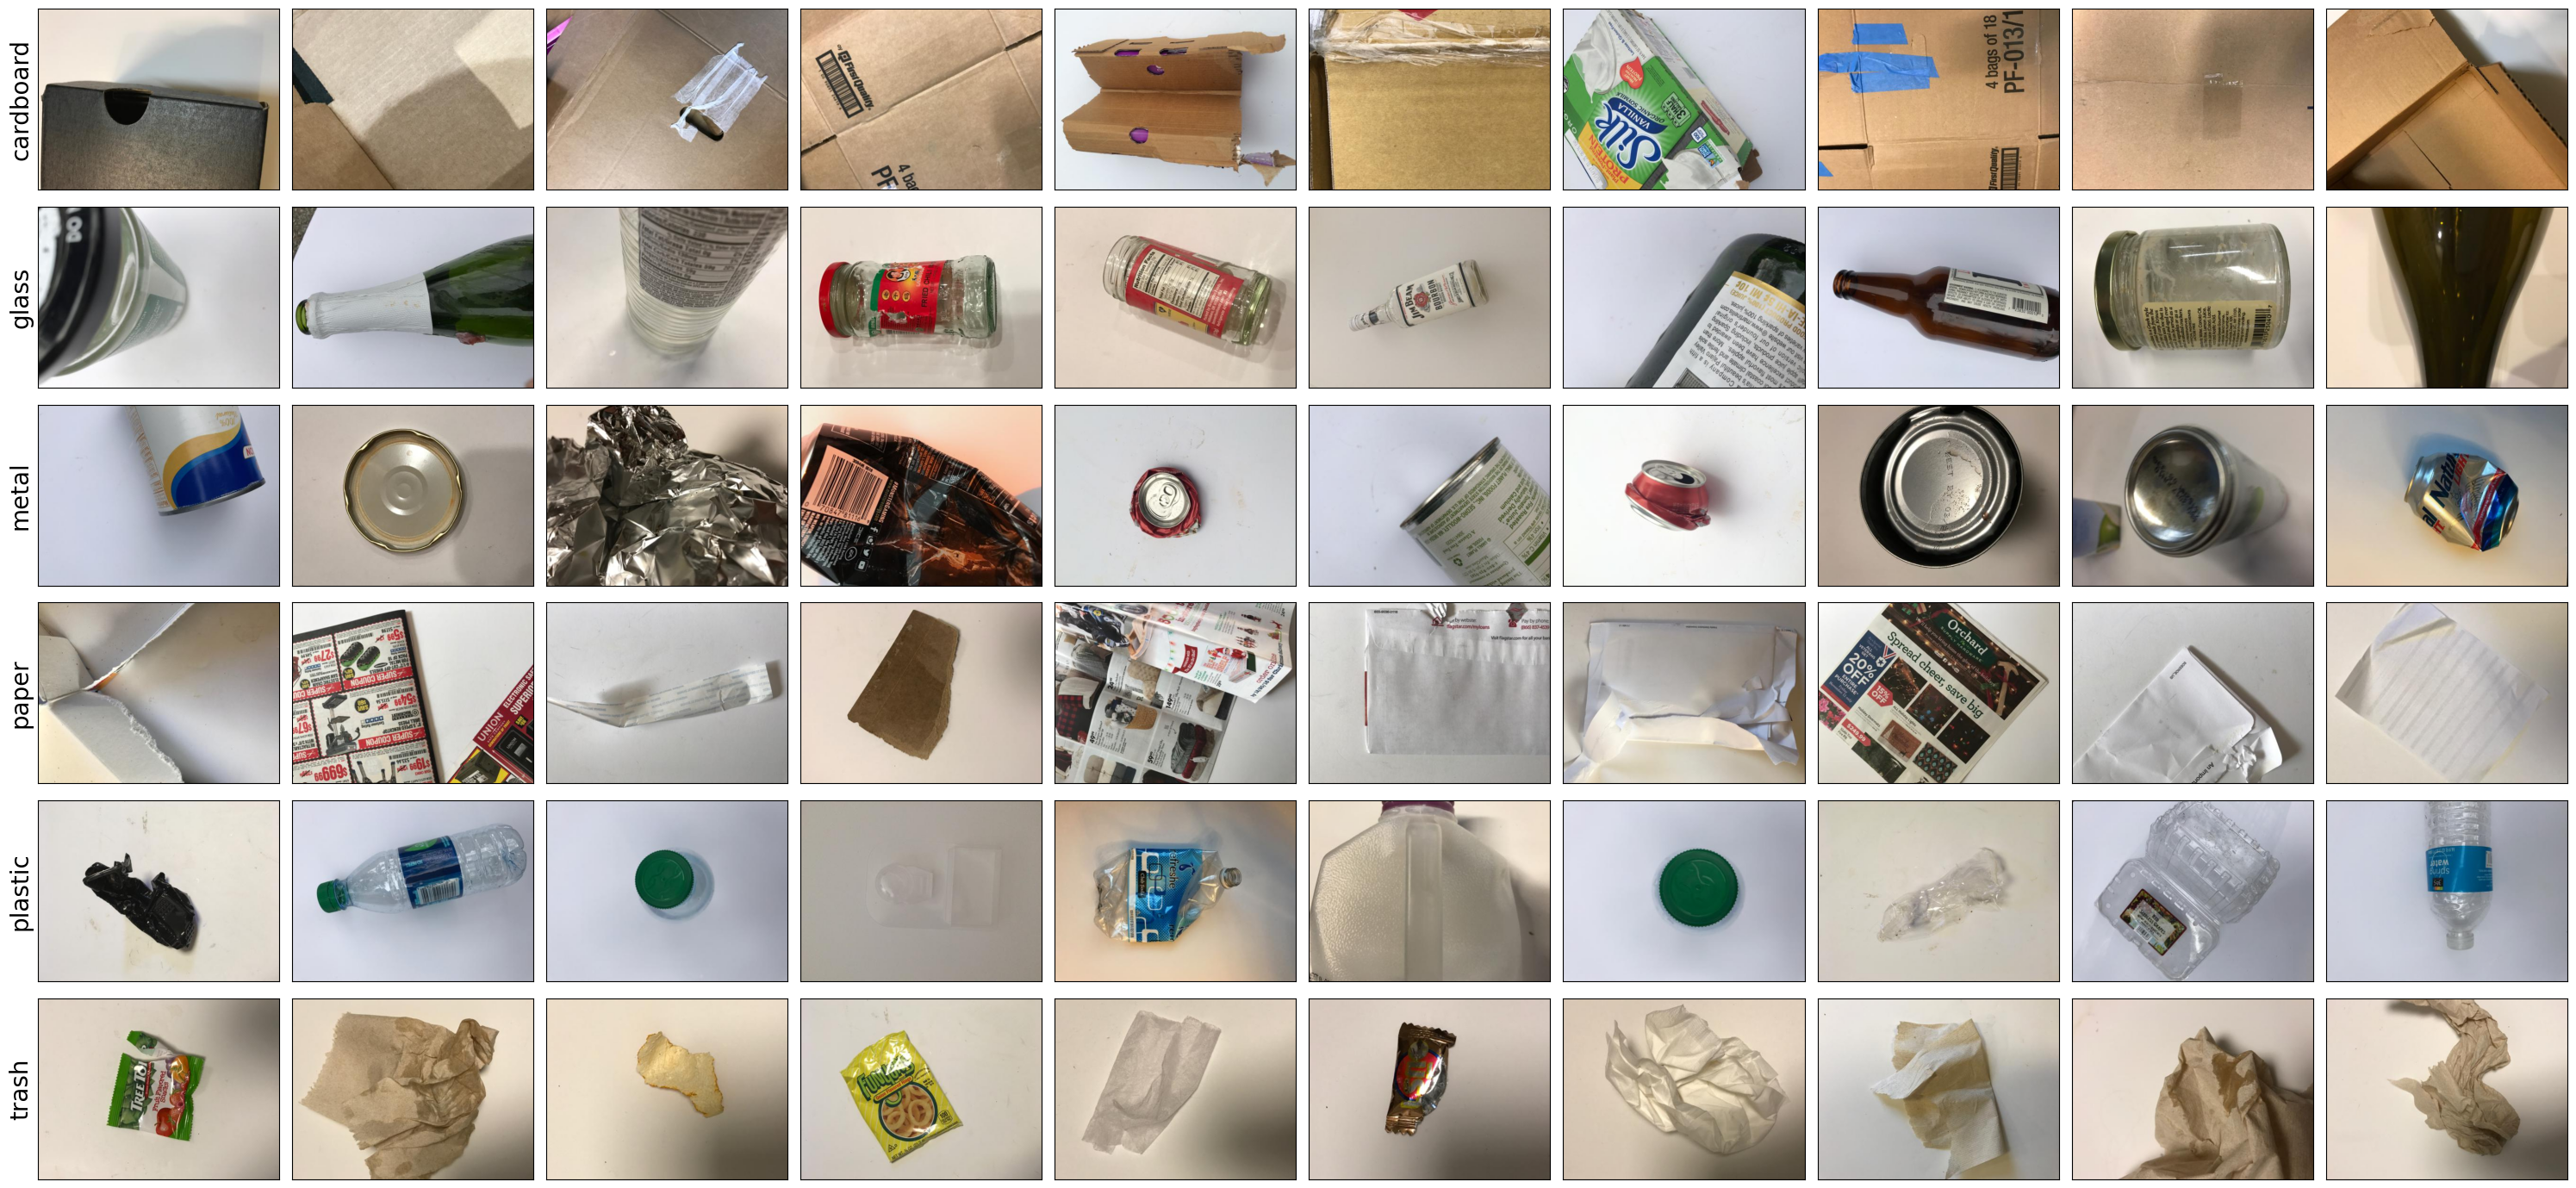

In [5]:
plt.figure(figsize=(30,14))

for i in range (6):
    directory = os.path.join(train_dir,labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        plt.subplot(6,10,i*10+j+1)
        plt.imshow(img)
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
plt.setp(plt.gcf().get_axes(),xticks=[],yticks=[]);
plt.tight_layout()
plt.show()


In [6]:
directory = os.path.join(train_dir,labels[2])
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

**DEEP LEARNING**

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape = (383,512,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation = 'softmax')
])
model.summary()  
    

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 381, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 381, 510, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 379, 508, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 379, 508, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 189, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 189, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 187, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 187, 252, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 185, 250, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 185, 250, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 92, 125, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 92, 125, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 123, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 90, 123, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 88, 121, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 88, 121, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 44, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 44, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 42, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 42, 58, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 40, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,247,334 (35.28 MB)

 Trainable params: 9,245,798 (35.27 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate = 0.0001), 
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
                    horizontal_flip = True,
                    vertical_flip = True,
                    rotation_range = 15,
                    zoom_range = 0.1,
                    width_shift_range = 0.15,
                    height_shift_range = 0.15,
                    shear_range = 0.1,
                    fill_mode = "nearest",
                    rescale = 1./255.,
                    validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (384,512),
                                                   batch_size = 32,
                                                   class_mode = 'binary',
                                                   subset = 'training')
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size = (384,512),
                                                        batch_size = 32,
                                                        class_mode = 'binary',
                                                        subset = 'validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [11]:
history = model.fit(train_generator, 
                   epochs =50,
                   verbose = 1,
                   validation_data = validation_generator,
                   callbacks = [callbacks])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-04 17:52:13.963530: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[32,32,382,510]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,384,512]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-04 17:52:14.386007: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.66437, expected 5.85827
202

 1/64 ━━━━━━━━━━━━━━━━━━━━ 1:04:55 62s/step - accuracy: 0.1562 - loss: 2.8884

I0000 00:00:1709574773.014874     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/64 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.2830 - loss: 2.4424

2024-03-04 17:53:28.996681: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.69423, expected 6.74365
2024-03-04 17:53:28.996738: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.38009, expected 6.42951
2024-03-04 17:53:28.996757: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.57492, expected 5.62433
2024-03-04 17:53:28.996776: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.88466, expected 4.93407
2024-03-04 17:53:28.996789: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.90802, expected 6.95744
2024-03-04 17:53:28.996802: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 8.20734, expected 7.25676
2024-03-04 17:53:28.996813: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 8.39329, expected 7.44271
2024-03-04 17:53:28.996824: E external/local_xla/xla/se

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3238 - loss: 2.2256

2024-03-04 17:54:44.785967: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[23,32,382,510]{3,2,1,0}, u8[0]{0}) custom-call(f32[23,3,384,512]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-04 17:54:44.800273: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 195472: 4.4825, expected 3.87269
2024-03-04 17:54:44.800319: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 196229: 4.77492, expected 4.16511
2024-03-04 17:54:44.800329: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 196270: 5.04968, expected 4.43987
2024-03-04 17:54:44.800339: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137]

64/64 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.3246 - loss: 2.2218 - val_accuracy: 0.2346 - val_loss: 3.4229
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.4540 - loss: 1.6240 - val_accuracy: 0.2286 - val_loss: 4.3066
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.4805 - loss: 1.5147 - val_accuracy: 0.2704 - val_loss: 4.7491
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.4778 - loss: 1.4765 - val_accuracy: 0.2008 - val_loss: 4.3607
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.4945 - loss: 1.4450 - val_accuracy: 0.2346 - val_loss: 4.9857
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.5256 - loss: 1.3958 - val_accuracy: 0.1988 - val_loss: 6.8736
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5370 - loss: 1.2914 - val_accuracy: 0.2127 - val_loss: 5.8470
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.5227 - loss: 1.3546 - val_accuracy: 0.2485 - val_loss: 7.1263


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


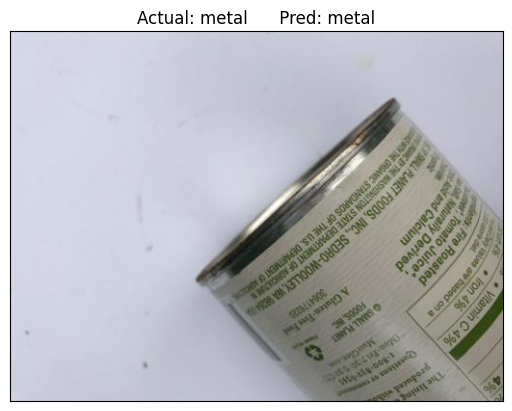

In [20]:
# cat = int(input('Enter any category by index: '))
# ind = int(input('Enter any index to test: '))
# directory = os.path.join(train_dir, labels[cat % 6])
directory = os.path.join(train_dir, labels[2])
try:
    path = os.path.join(directory, os.listdir(directory)[5])
    img = mpimg.imread(path)
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]
    
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Actual: {}      Pred: {}'.format(labels[2], pred))
    
except:
    print('Invalid Value')